# Exploring Relationships 

### Script content
#### 1. Importing Libraries and Dataset
#### 2. checking data for duplicates, missing value & mixed type data
#### 3. Exploring Relationships

### 1. Importing Libraries and Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [10]:
# Defining path

path =r'/Users/tanu/Desktop/Data Analytics/Achievement 6/Data'

In [13]:
# Importing data set

df = pd.read_csv(os.path.join(path,'original data','Global_Cybersecurity_Threats.csv'), index_col = False)

In [15]:
df.shape

(3000, 10)

In [17]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


### 2. Checking for Duplicates, Missing values & Mixed Type Data

#### Result :
#### - No Duplicats
#### - No Missing values
#### - No Mixed type data

In [21]:
# Checking for duplicates

df_dups = df[df.duplicated()]

In [23]:
df_dups.shape

(0, 10)

In [25]:
# checking for missing values

df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [27]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [29]:
# Checking for mixed type data

for col in df.columns.tolist():
    weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df[weird])>0:
        print(col)

In [31]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


### 3. Exploring Relationships
#### 3.1 Correlations :

In [34]:
# creating a sub data with numeric value columns only

df_1 = df[['Year','Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']]

In [36]:
df_1.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
0,2019,80.53,773169,63
1,2019,62.19,295961,71
2,2017,38.65,605895,20
3,2024,41.44,659320,7
4,2018,74.41,810682,68


In [38]:
df_1.corr()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
Year,1.000000,0.010581,0.002317,-0.004982
Financial Loss (in Million $),0.010581,1.000000,0.001787,-0.012671
Number of Affected Users,0.002317,0.001787,1.000000,0.005893
Incident Resolution Time (in Hours),-0.004982,-0.012671,0.005893,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 1000x1000 with 0 Axes>

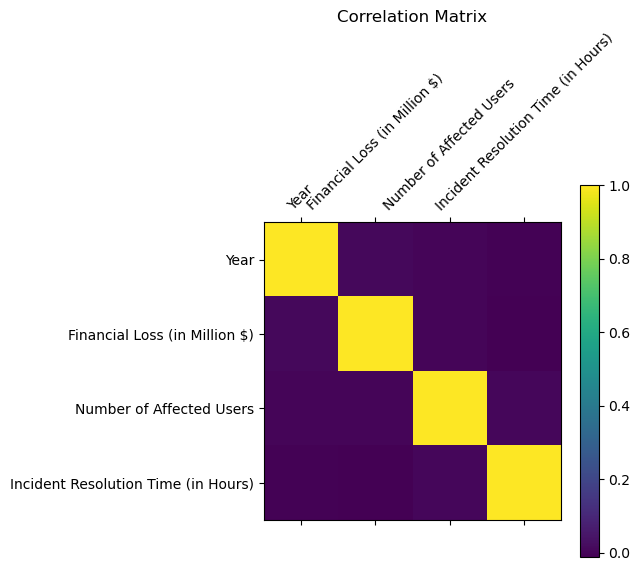

In [40]:
# Creating a correlation heatmap with matplotlib

f1 = plt.figure(figsize = (10,10)) # figure size
plt.matshow(df_1.corr()) # type of plot
plt.xticks(range(df_1.shape[1]),df_1.columns, fontsize=10, rotation = 45) # x axis labels
plt.yticks(range(df_1.shape[1]),df_1.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a color legend
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=12) # Add title

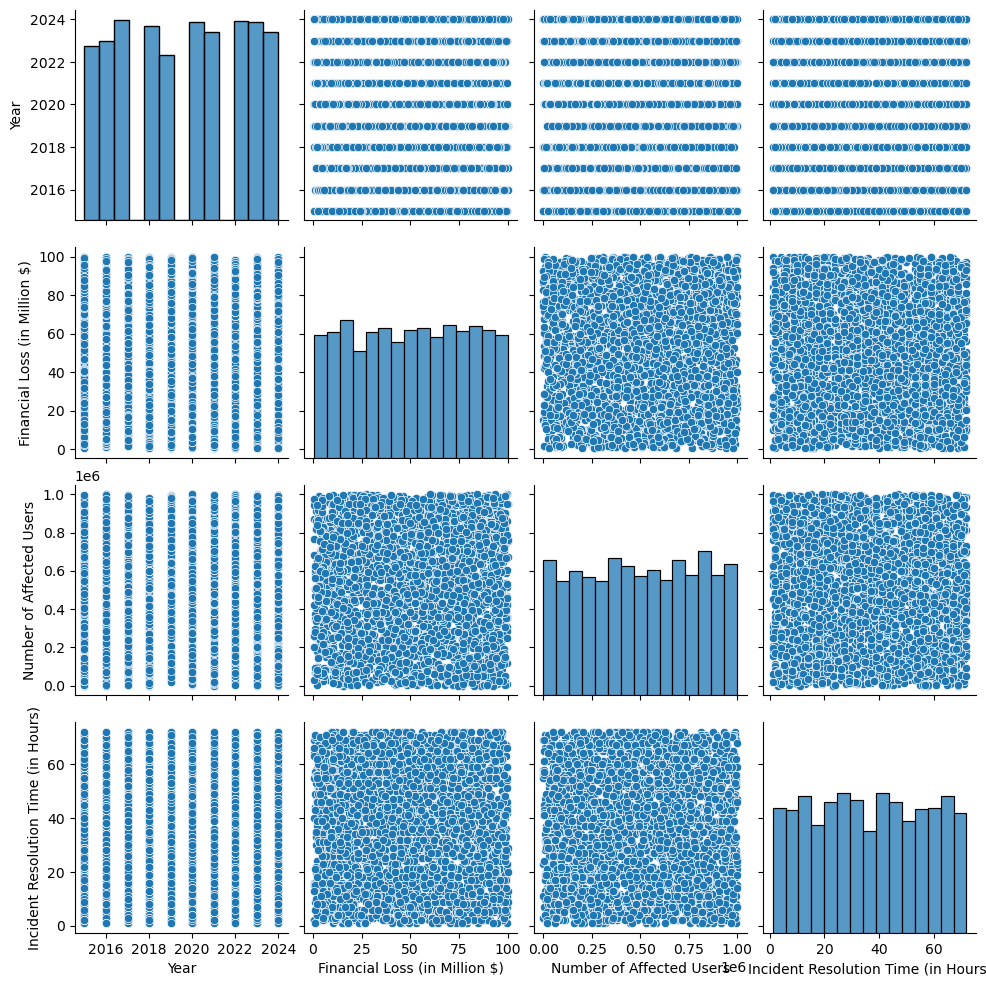

In [42]:
pp = sns.pairplot(df_1)

<Axes: xlabel='Number of Affected Users', ylabel='Count'>

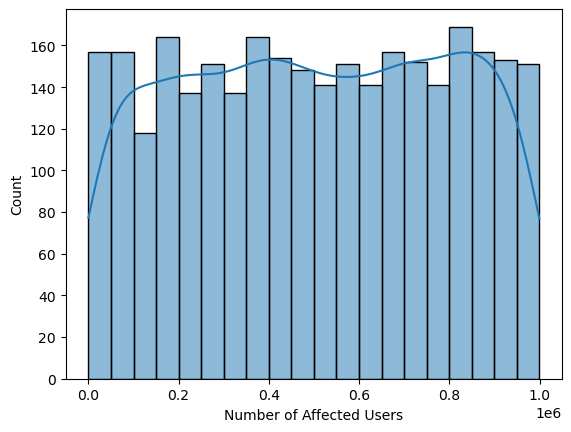

In [43]:
sns.histplot(df['Number of Affected Users'], bins = 20, kde = True)

In [46]:
df.loc[df['Number of Affected Users'] <= 300000, 'Affected Users'] = 'Low'
df.loc[(df['Number of Affected Users']> 300000) & (df['Number of Affected Users'] <=600000), 'Affected Users'] = 'Medium'
df.loc[df['Number of Affected Users'] > 600000, 'Affected Users'] = 'High'

In [48]:
df['Affected Users'].value_counts()

Affected Users
High      1221
Medium     895
Low        884
Name: count, dtype: int64

In [50]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)',
       'Affected Users'],
      dtype='object')

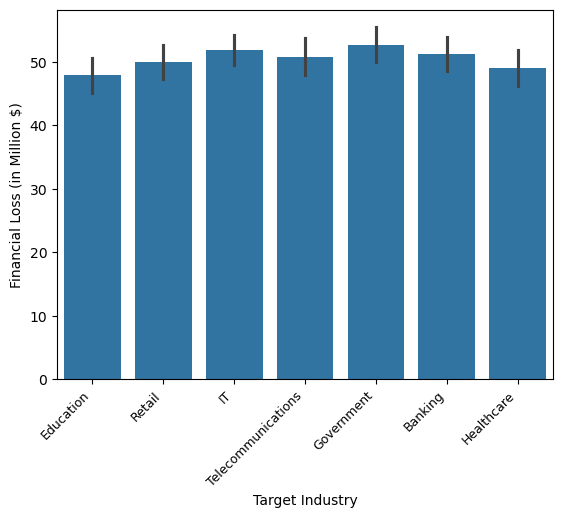

In [90]:
sns.barplot(data=df, x='Target Industry', y='Financial Loss (in Million $)')
plt.xticks(rotation=45, ha = 'right', fontsize=9)
plt.show()

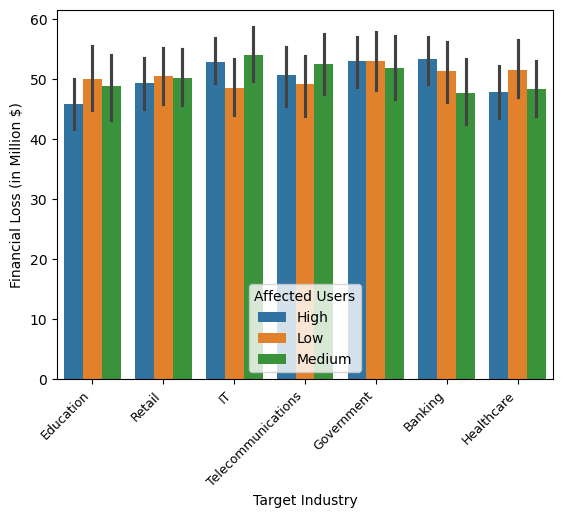

In [77]:
sns.barplot(data=df, x='Target Industry', y='Financial Loss (in Million $)', hue='Affected Users')
plt.xticks(rotation=45, ha = 'right', fontsize=9)
plt.show()

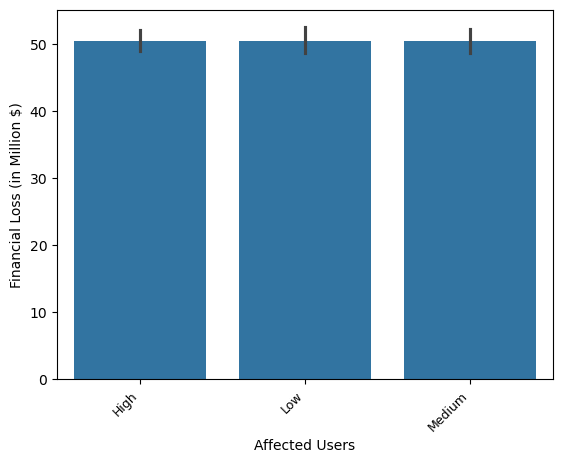

In [92]:
sns.barplot(data=df, x='Affected Users', y='Financial Loss (in Million $)')
plt.xticks(rotation=45, ha = 'right', fontsize=9)
plt.show()

In [ ]:
sns.barplot(data=df, x='Target Industry', y='Financial Loss (in Million $)', hue='Affected Users')
plt.xticks(rotation=45, ha = 'right', fontsize=9)
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Phishing'),
  Text(1, 0, 'Ransomware'),
  Text(2, 0, 'Man-in-the-Middle'),
  Text(3, 0, 'DDoS'),
  Text(4, 0, 'SQL Injection'),
  Text(5, 0, 'Malware')])

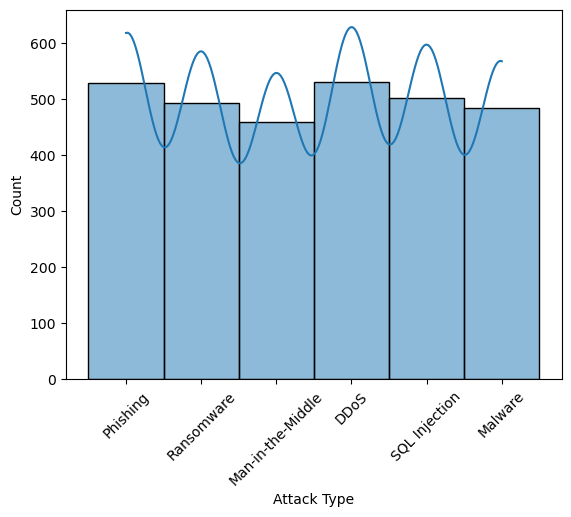

In [54]:
sns.histplot(df['Attack Type'], bins = 20, kde = True)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'China'),
  Text(1, 0, 'India'),
  Text(2, 0, 'UK'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Russia'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'USA')])

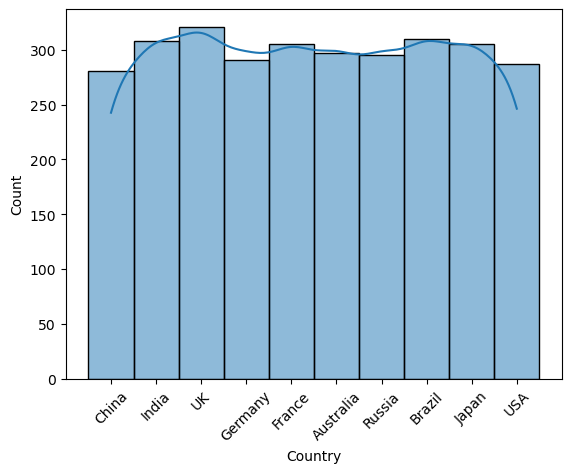

In [57]:
sns.histplot(df['Country'], bins = 20, kde = True)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Retail'),
  Text(2, 0, 'IT'),
  Text(3, 0, 'Telecommunications'),
  Text(4, 0, 'Government'),
  Text(5, 0, 'Banking'),
  Text(6, 0, 'Healthcare')])

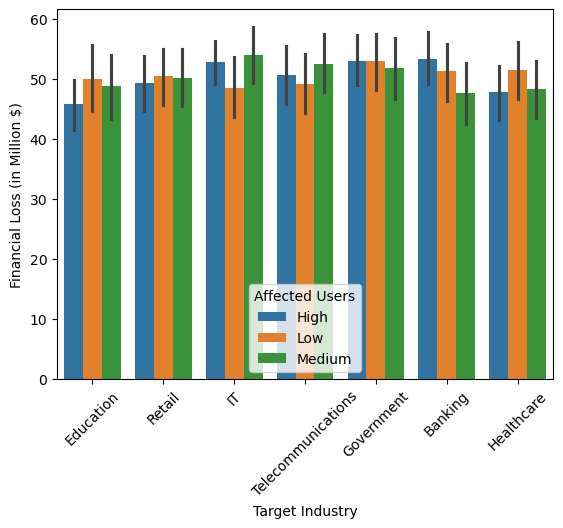

In [72]:
sns.barplot(data=df, x='Target Industry', y='Financial Loss (in Million $)', hue = 'Affected Users')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'VPN'),
  Text(1, 0, 'Firewall'),
  Text(2, 0, 'AI-based Detection'),
  Text(3, 0, 'Antivirus'),
  Text(4, 0, 'Encryption')])

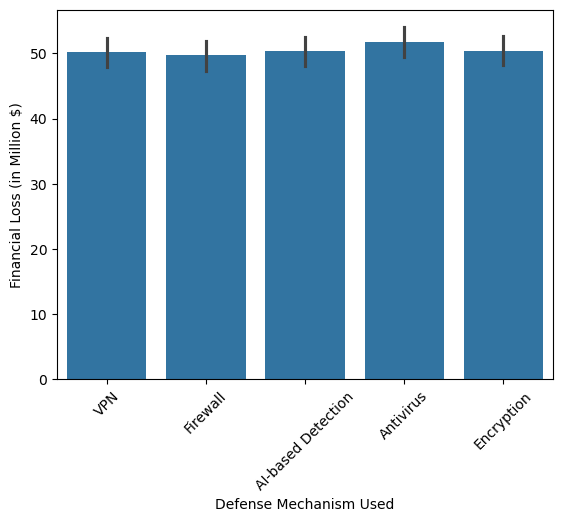

In [85]:
sns.barplot(data=df, x='Defense Mechanism Used', y='Financial Loss (in Million $)')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Retail'),
  Text(2, 0, 'IT'),
  Text(3, 0, 'Telecommunications'),
  Text(4, 0, 'Government'),
  Text(5, 0, 'Banking'),
  Text(6, 0, 'Healthcare')])

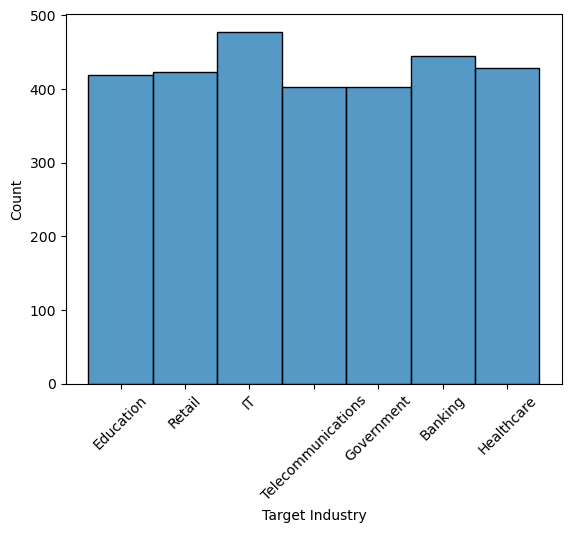

In [63]:
sns.histplot(df['Target Industry'], bins = 20)
plt.xticks(rotation=45)

#### Q: Which industries are most heavily impacted by cyber threats?
#### A: IT has seen most number of attacks, but Government sector has lost most amount of money in cyber attacks till date. 

#### Q: Which type of attacks are more frequent?
#### A: Phishing and DDos are most frequent type of attcks, since 2015

#### Q: Which Country or region is more frequently targeted ?
#### A: UK has faced most attacks among all the countries

In [94]:
# Exporting File

df.to_csv(os.path.join(path,'prepared data','Global_Cybersecurity_Threats.csv'))